In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aaaaaa1/Amazon Sales Analysis SALESDATA.csv


In [2]:
df = pd.read_csv("../input/aaaaaa1/Amazon Sales Analysis SALESDATA.csv")

In [3]:
# Check for missing values
print(df.isnull().sum())

Custkey                                0
DateKey                                0
Discount Amount                        2
Invoice Date                           0
Invoice Number                         0
Item Class                          8285
Item Number                           40
Item                                   0
Line Number                            0
List Price                             0
Order Number                           0
Promised Delivery Date                 0
Sales Amount                           0
Sales Amount Based on List Price       0
Sales Cost Amount                      0
Sales Margin Amount                    0
Sales Price                            1
Sales Quantity                         0
Sales Rep                              0
U/M                                    0
dtype: int64


In [4]:
# Fill missing `Discount Amount` and `Sales Price` with the mean value
df['Discount Amount'].fillna(df['Discount Amount'].mean(), inplace=True)
df['Sales Price'].fillna(df['Sales Price'].mean(), inplace=True)


/tmp/ipykernel_17/2791355942.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Discount Amount'].fillna(df['Discount Amount'].mean(), inplace=True)
/tmp/ipykernel_17/2791355942.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

In [5]:
# Descriptive statistics for numerical columns
descriptive_stats = df.describe()
print(descriptive_stats)

            Custkey  Discount Amount  Invoice Number    Line Number  \
count  6.528000e+04     65280.000000    65280.000000   65280.000000   
mean   1.001770e+07      1855.628805   216227.222089   23714.515043   
std    7.175933e+03      9037.135441    94991.559484   32664.303299   
min    1.000045e+07   -255820.800000   100080.000000    1000.000000   
25%    1.001272e+07       246.122500   117931.000000    3000.000000   
50%    1.001966e+07       441.760000   222870.500000   12000.000000   
75%    1.002351e+07      1000.100000   314319.250000   32000.000000   
max    1.002758e+07    343532.660000   332842.000000  344000.000000   

         List Price   Order Number   Sales Amount  \
count  65280.000000   65280.000000   65280.000000   
mean     514.705779  180582.468673    2852.118522   
std      449.190065   67594.820895   15164.567492   
min        0.000000  100838.000000     200.010000   
25%      181.560000  115319.750000     308.410000   
50%      325.190000  203702.000000     553

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65280 entries, 0 to 65279
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Custkey                           65280 non-null  int64  
 1   DateKey                           65280 non-null  object 
 2   Discount Amount                   65280 non-null  float64
 3   Invoice Date                      65280 non-null  object 
 4   Invoice Number                    65280 non-null  int64  
 5   Item Class                        56995 non-null  object 
 6   Item Number                       65240 non-null  object 
 7   Item                              65280 non-null  object 
 8   Line Number                       65280 non-null  int64  
 9   List Price                        65280 non-null  float64
 10  Order Number                      65280 non-null  int64  
 11  Promised Delivery Date            65280 non-null  object 
 12  Sale

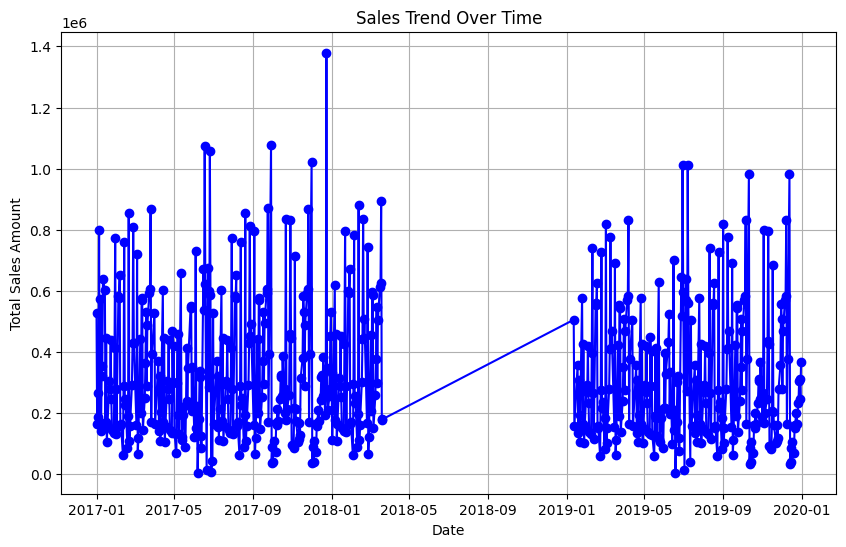

In [7]:
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])

# Group by 'Invoice Date' and sum 'Sales Amount' to analyze trends
sales_trend = df.groupby('Invoice Date')['Sales Amount'].sum().reset_index()

# Plotting the sales trend
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(sales_trend['Invoice Date'], sales_trend['Sales Amount'], marker='o', linestyle='-', color='b')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.show()

In [8]:
# Top products by quantity sold
top_products_quantity = df.groupby('Item')['Sales Quantity'].sum().reset_index().sort_values(by='Sales Quantity', ascending=False).head(10)
print(top_products_quantity)

# Top products by sales revenue
top_products_revenue = df.groupby('Item')['Sales Amount'].sum().reset_index().sort_values(by='Sales Amount', ascending=False).head(10)
print(top_products_revenue)

                              Item  Sales Quantity
86      Better Large Canned Shrimp          590343
386       High Top Dried Mushrooms          377259
78       Better Canned Tuna in Oil          266996
642              Walrus Chardonnay          212022
552         Red Spade Pimento Loaf          163296
270      Even Better String Cheese          105559
471        Landslide Hot Chocolate           98465
329         Golden Frozen Broccoli           48040
615  Tell Tale Red Delcious Apples           31120
492                Moms Sliced Ham           27790
                             Item  Sales Amount
86     Better Large Canned Shrimp   15454172.47
386      High Top Dried Mushrooms   13368414.53
552        Red Spade Pimento Loaf    5711486.45
78      Better Canned Tuna in Oil    5693075.12
247                  Ebony Squash    5380727.75
96   Big Time Frozen Cheese Pizza    5127171.17
314              Fast Mini Donuts    5009499.08
85   Better Fancy Canned Sardines    4975348.35
209    

In [9]:
# Group by 'Custkey' to analyze customer behavior
customer_sales = df.groupby('Custkey')['Sales Amount'].sum().reset_index().sort_values(by='Sales Amount', ascending=False)
customer_sales['Purchase Frequency'] = df.groupby('Custkey')['Invoice Number'].nunique().values

print(customer_sales.head(10))

      Custkey  Sales Amount  Purchase Frequency
406  10021485   11397206.36                 106
138  10009676   10843991.23                  14
504  10025024    9254771.72                  20
394  10021300    8707904.14                   9
516  10025052    5433005.93                   6
566  10025737    5202201.60                  49
512  10025039    3275015.91                 104
573  10025919    3251414.29                   3
39   10002154    3122752.50                  52
309  10019194    3113493.93                  43


In [10]:
# Group by 'Sales Rep' to analyze sales performance
sales_rep_performance = df.groupby('Sales Rep')['Sales Amount'].sum().reset_index().sort_values(by='Sales Amount', ascending=False)
print(sales_rep_performance)

# Sales Rep performance by quantity sold
sales_rep_quantity = df.groupby('Sales Rep')['Sales Quantity'].sum().reset_index().sort_values(by='Sales Quantity', ascending=False)
print(sales_rep_quantity)

    Sales Rep  Sales Amount
28        141   25472367.39
59        181   21526416.57
34        149   12778826.17
58        180    8045438.66
25        134    7898160.23
..        ...           ...
61        183     201207.31
36        151     183910.44
12        116     158207.43
51        169      62853.99
35        150      35416.78

[64 rows x 2 columns]
    Sales Rep  Sales Quantity
59        181          850141
10        114          399459
34        149          367437
5         109          171701
39        154          148972
..        ...             ...
12        116            1003
36        151             635
33        147             550
51        169             248
35        150             133

[64 rows x 2 columns]


                     Sales Quantity  Discount Amount  Sales Margin Amount  \
Sales Quantity             1.000000         0.085400             0.722239   
Discount Amount            0.085400         1.000000             0.461914   
Sales Margin Amount        0.722239         0.461914             1.000000   
Sales Price               -0.091440         0.046739            -0.001063   

                     Sales Price  
Sales Quantity         -0.091440  
Discount Amount         0.046739  
Sales Margin Amount    -0.001063  
Sales Price             1.000000  


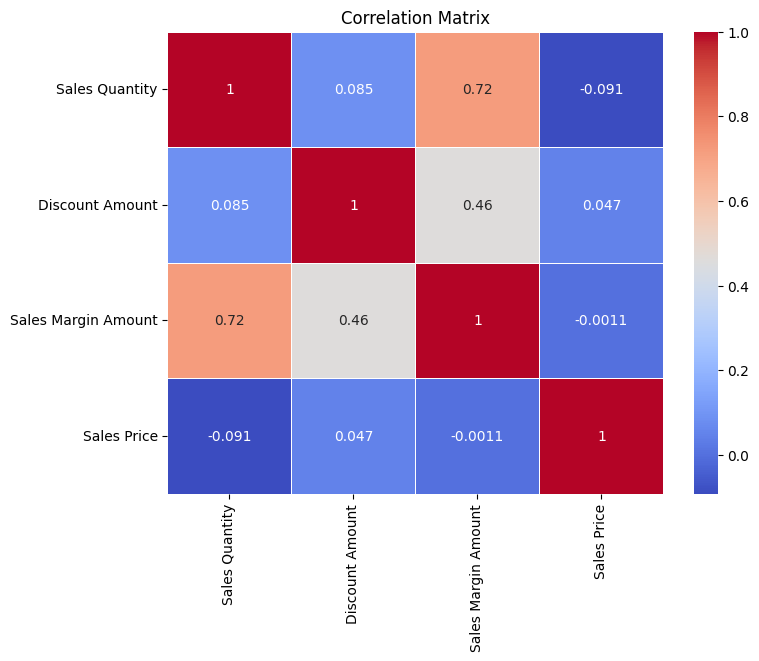

In [11]:
# Correlation between key numerical columns
correlation_matrix = df[['Sales Quantity', 'Discount Amount', 'Sales Margin Amount', 'Sales Price']].corr()

print(correlation_matrix)

# Plotting the correlation matrix as a heatmap
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

                              Item      Profit
86      Better Large Canned Shrimp  5459826.26
386       High Top Dried Mushrooms  4659800.16
96    Big Time Frozen Cheese Pizza  2826772.99
314               Fast Mini Donuts  2663325.66
209             Discover Manicotti  2381667.84
247                   Ebony Squash  2336246.16
85    Better Fancy Canned Sardines  2131933.94
480          Landslide White Sugar  2079755.46
615  Tell Tale Red Delcious Apples  1977923.42
78       Better Canned Tuna in Oil  1903351.46


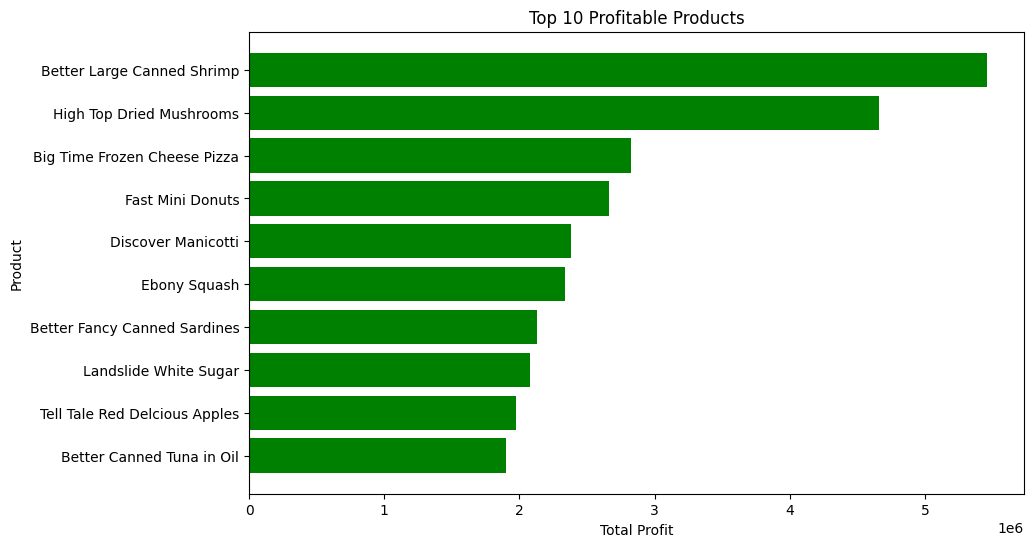

In [12]:
# Calculate profit per transaction
df['Profit'] = df['Sales Amount'] - df['Sales Cost Amount']

# Group by 'Item' to find total profit per product
profit_per_product = df.groupby('Item')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)

print(profit_per_product.head(10))

# Plotting top 10 profitable products
plt.figure(figsize=(10, 6))
plt.barh(profit_per_product['Item'].head(10), profit_per_product['Profit'].head(10), color='green')
plt.title('Top 10 Profitable Products')
plt.xlabel('Total Profit')
plt.ylabel('Product')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest profit at the top
plt.show()


Year         2017        2018        2019
Month                                    
1      8650450.48  7633808.48  3187480.58
2      7216327.65  6707430.91  6573591.35
3      7567525.47  6476231.61  7670415.60
4      5650633.87         NaN  6461262.71
5      5988460.88         NaN  5064603.27
6      8674182.00         NaN  7178214.38
7      6391727.78         NaN  6895857.61
8      7749377.54         NaN  6841233.86
9      8786342.38         NaN  7679926.49
10     6368884.91         NaN  6461098.60
11     7150974.78         NaN  6643787.28
12     7267346.75         NaN  7249119.92


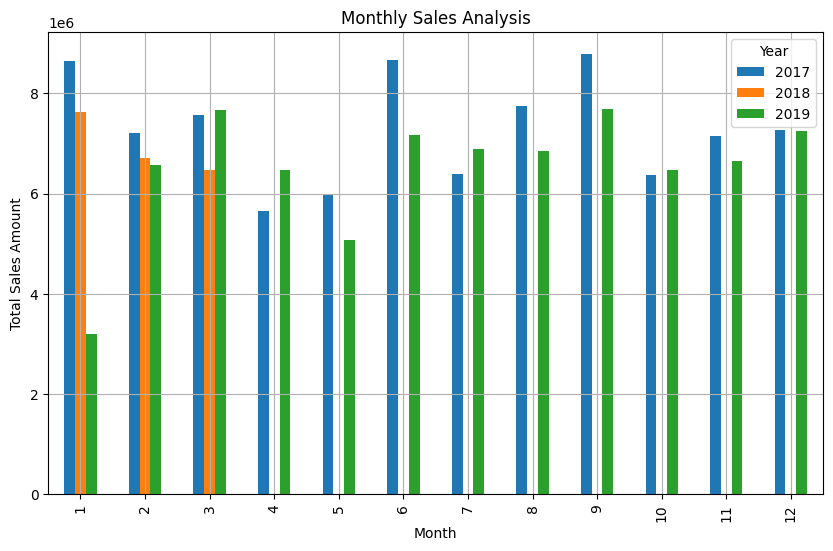

In [13]:
#Extract month and year from the 'Invoice Date'
df['Month'] = df['Invoice Date'].dt.month
df['Year'] = df['Invoice Date'].dt.year

# Group by month and year to analyze monthly sales
monthly_sales = df.groupby(['Year', 'Month'])['Sales Amount'].sum().reset_index()

# Pivot for better visualization
monthly_sales_pivot = monthly_sales.pivot(index='Month', columns='Year', values='Sales Amount')

print(monthly_sales_pivot)

# Plotting monthly sales trend
monthly_sales_pivot.plot(kind='bar', figsize=(10, 6))
plt.title('Monthly Sales Analysis')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.legend(title='Year')
plt.grid(True)
plt.show()

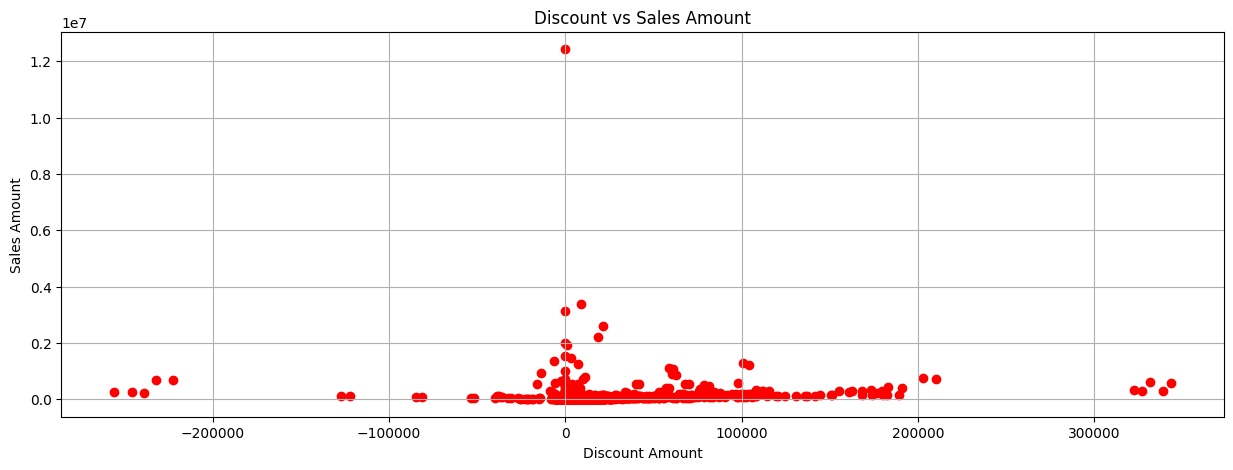

In [14]:
# Analyze the relationship between discount and sales
discount_vs_sales = df.groupby('Discount Amount')['Sales Amount'].sum().reset_index()

# Plot discount vs sales
plt.figure(figsize=(15, 5))
plt.scatter(discount_vs_sales['Discount Amount'], discount_vs_sales['Sales Amount'], color='red')
plt.title('Discount vs Sales Amount')
plt.xlabel('Discount Amount')
plt.ylabel('Sales Amount')
plt.grid(True)
plt.show()

In [15]:
# Total revenue per customer
customer_revenue = df.groupby('Custkey')['Sales Amount'].sum().reset_index()

# Average revenue per transaction
customer_avg_revenue = df.groupby('Custkey')['Sales Amount'].mean().reset_index()

# Total number of orders per customer
customer_orders = df.groupby('Custkey')['Invoice Number'].nunique().reset_index()

# Merge data for CLV calculation
customer_ltv = pd.merge(customer_revenue, customer_orders, on='Custkey')
customer_ltv.columns = ['Custkey', 'Total Revenue', 'Total Orders']
customer_ltv['Average Revenue per Order'] = customer_ltv['Total Revenue'] / customer_ltv['Total Orders']

print(customer_ltv.head(10))

    Custkey  Total Revenue  Total Orders  Average Revenue per Order
0  10000453      180549.30           106                1703.295283
1  10000455       22403.73            14                1600.266429
2  10000456      227440.19            20               11372.009500
3  10000457       29723.40             9                3302.600000
4  10000458      103528.05             6               17254.675000
5  10000460       96533.04            49                1970.062041
6  10000461      667968.22           104                6422.771346
7  10000462        1648.46             3                 549.486667
8  10000466       92737.54            52                1783.414231
9  10000469      344124.34            43                8002.891628


   Item Class  Sales Amount
0         P01   94242996.98
3         P04      89248.66
8         P09      11229.00
9         P10       8722.00
15        PO1       5890.32
12        P13       5448.60
4         P05       1950.00
11        P12       1472.24
6         P07        541.92
13        P14        526.64
1         P02        438.93
5         P06        424.30
10        P11        353.43
7         P08        353.40
14        P15        346.53
2         P03        211.75


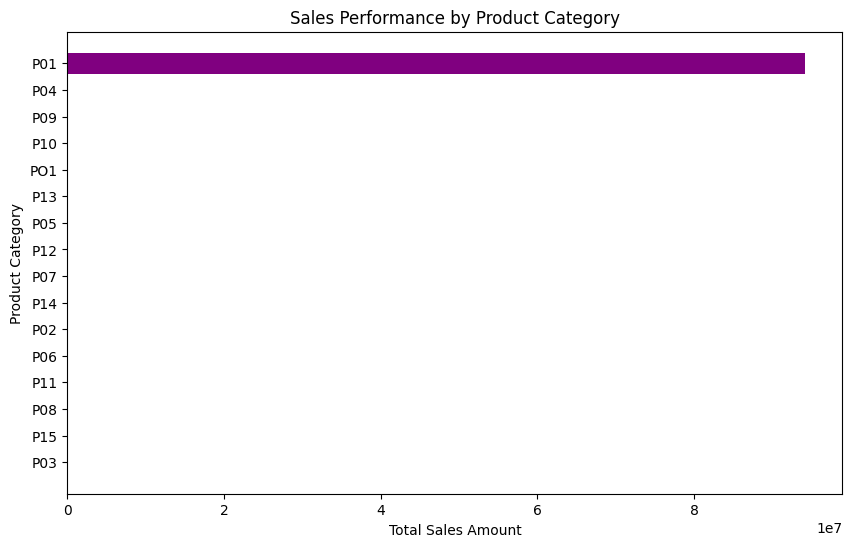

In [16]:
# Grouping by 'Item Class' to analyze category performance
category_performance = df.groupby('Item Class')['Sales Amount'].sum().reset_index().sort_values(by='Sales Amount', ascending=False)

print(category_performance)

# Plotting sales performance by category
plt.figure(figsize=(10, 6))
plt.barh(category_performance['Item Class'], category_performance['Sales Amount'], color='purple')
plt.title('Sales Performance by Product Category')
plt.xlabel('Total Sales Amount')
plt.ylabel('Product Category')
plt.gca().invert_yaxis()
plt.show()

In [17]:
# Calculate total sales and total number of orders
total_sales = df['Sales Amount'].sum()
total_orders = df['Invoice Number'].nunique()

# Calculate Average Order Value
aov = total_sales / total_orders
print(f"Average Order Value (AOV): ${aov:.2f}")

Average Order Value (AOV): $7544.32


In [18]:
# Extract year and month from 'Invoice Date'
df['Invoice YearMonth'] = df['Invoice Date'].dt.to_period('M')

# Retention analysis by customer first purchase date
first_purchase = df.groupby('Custkey')['Invoice YearMonth'].min().reset_index()
first_purchase.columns = ['Custkey', 'First Purchase Date']

# Merging first purchase data with the main dataset
df = pd.merge(df, first_purchase, on='Custkey')

# Calculate retention for customers who made repeat purchases
repeat_customers = df[df['Invoice YearMonth'] > df['First Purchase Date']]

print(repeat_customers.head())

    Custkey     DateKey  Discount Amount Invoice Date  Invoice Number  \
0  10016609  12/31/2019           398.73   2019-12-31          329568   
1  10016609  12/31/2019           268.67   2019-12-31          329569   
2  10016609  12/31/2019           398.73   2019-12-31          329569   
3  10016609  12/31/2019           466.45   2019-12-31          329569   
4  10016609  12/31/2019           515.51   2019-12-31          329569   

  Item Class Item Number                        Item  Line Number  List Price  \
0        P01       15640         Super Vegetable Oil         1000      163.47   
1        P01       31681  Golden Fajita French Fries         7000      275.37   
2        P01       15640         Super Vegetable Oil         4000      163.47   
3        P01       13447            High Top Oranges         3000      119.52   
4        P01       36942       Tell Tale New Potatos         9000      264.18   

   ...  Sales Margin Amount Sales Price  Sales Quantity  Sales Rep  U/M  \

In [19]:
# Recency: Number of days since last purchase
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])
most_recent_purchase = df['Invoice Date'].max()
df['Recency'] = (most_recent_purchase - df.groupby('Custkey')['Invoice Date'].transform('max')).dt.days

# Frequency: Total number of orders per customer
df['Frequency'] = df.groupby('Custkey')['Invoice Number'].transform('nunique')

# Monetary: Total sales amount per customer
df['Monetary'] = df.groupby('Custkey')['Sales Amount'].transform('sum')

# Combine into RFM DataFrame
rfm = df[['Custkey', 'Recency', 'Frequency', 'Monetary']].drop_duplicates()

print(rfm.head())

     Custkey  Recency  Frequency    Monetary
0   10016609        0         15    68614.84
7   10026081        0        270  1376177.23
12  10005099        0         51    79633.50
14  10026606        0        262  2994077.19
15  10021996        0         25    54407.61


In [20]:
# Calc#Calculate sales growth by year
sales_growth = df.groupby(df['Invoice Date'].dt.year)['Sales Amount'].sum().pct_change() * 100

print(f'Sales Growth Rate by Year (%):\n{sales_growth}')

Sales Growth Rate by Year (%):
Invoice Date
2017           NaN
2018    -76.198332
2019    274.236581
Name: Sales Amount, dtype: float64


In [21]:
#Conclusion:-
#Top Products and Profitability
#Seasonal Sales Trends
#Customer Segmentation and Lifetime Value
#Sales Rep and Performance Variability
#Discount Impact on Sales 